In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [7]:
def sum_df(df):
    print("====================== Shape =======================")
    print(df.shape)
    print("\n====================== Columns =======================")
    print(df.columns)
    print("\n==================== Info ======================")
    df.info()
    print("====================== Types ======================")
    print(df.dtypes)
    print("====================== NA ======================")
    print(df.isnull().sum())

In [8]:
sum_df(data)

====================== Shape =======================
(303, 14)

====================== Columns =======================
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

==================== Info ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-

In [9]:
data.duplicated().sum()

1

In [10]:
data.loc[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
numeric_data= data.select_dtypes(include=[np.number])

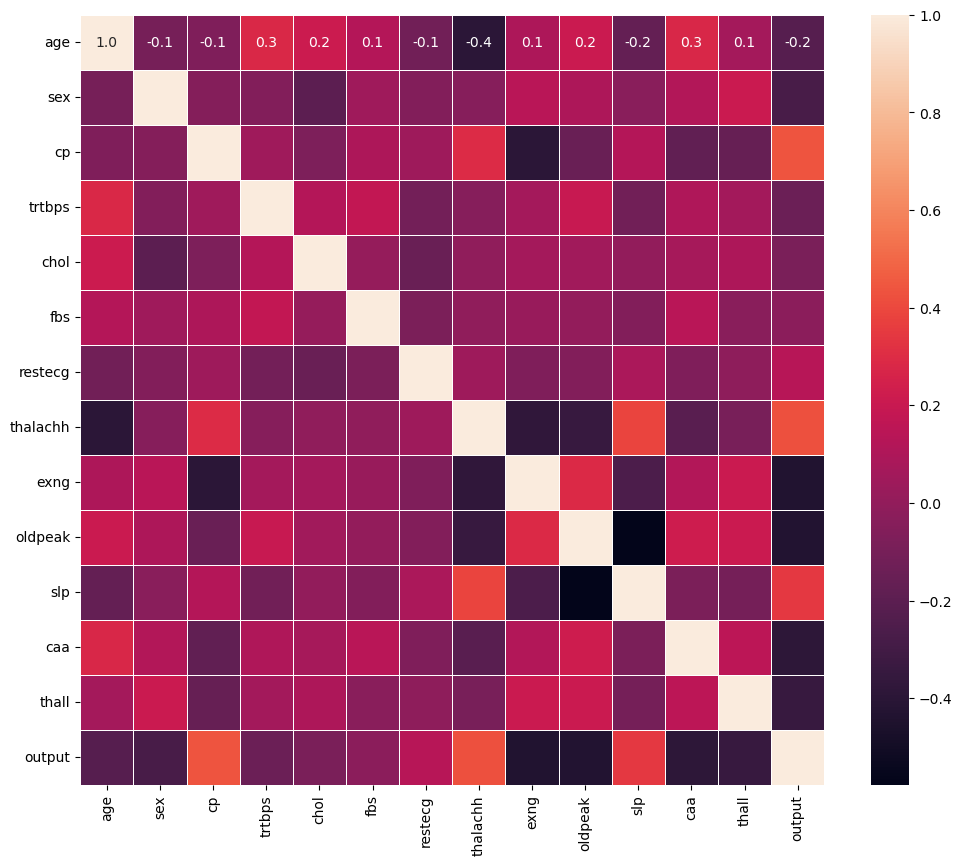

In [13]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(numeric_data.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

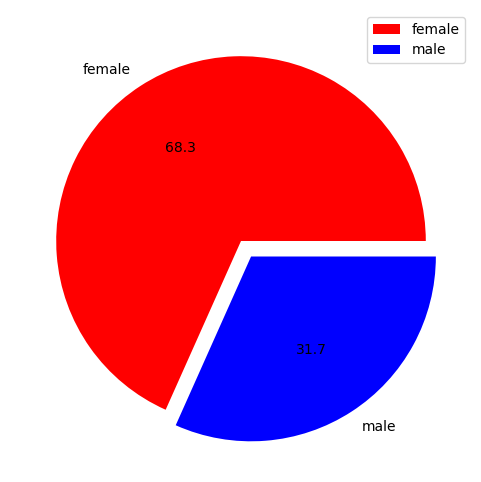

In [14]:

labels = ["female","male"]
count = data['sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(count,labels=labels,autopct='%.1f',explode=(0,0.1),colors=['red','blue'])
plt.legend(labels=labels)
plt.show()

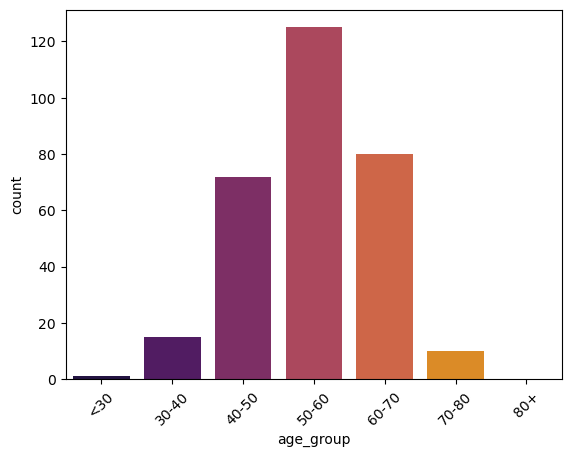

In [15]:
bins = [0,30,40,50,60,70,80,100]
labels=['<30','30-40','40-50','50-60','60-70','70-80','80+']
data['age_group'] = pd.cut(data['age'],bins=bins,labels=labels,right=False)

sns.countplot(data=data,x='age_group',palette='inferno')
plt.xticks(rotation=45)
plt.show()

In [70]:
data = pd.read_csv('heart.csv')

In [71]:
data['cp'] = data['cp'].map({0: "typical angina", 1: "atypical angina", 2: "non-anginal pain", 3: "asymptomatic"})

NaN olmadan önceki count serisi:
cp
typical angina      143
atypical angina      50
non-anginal pain     87
asymptomatic         23
Name: count, dtype: int64
NaN sonrası count serisi:
cp
typical angina      143
atypical angina      50
non-anginal pain     87
asymptomatic         23
Name: count, dtype: int64


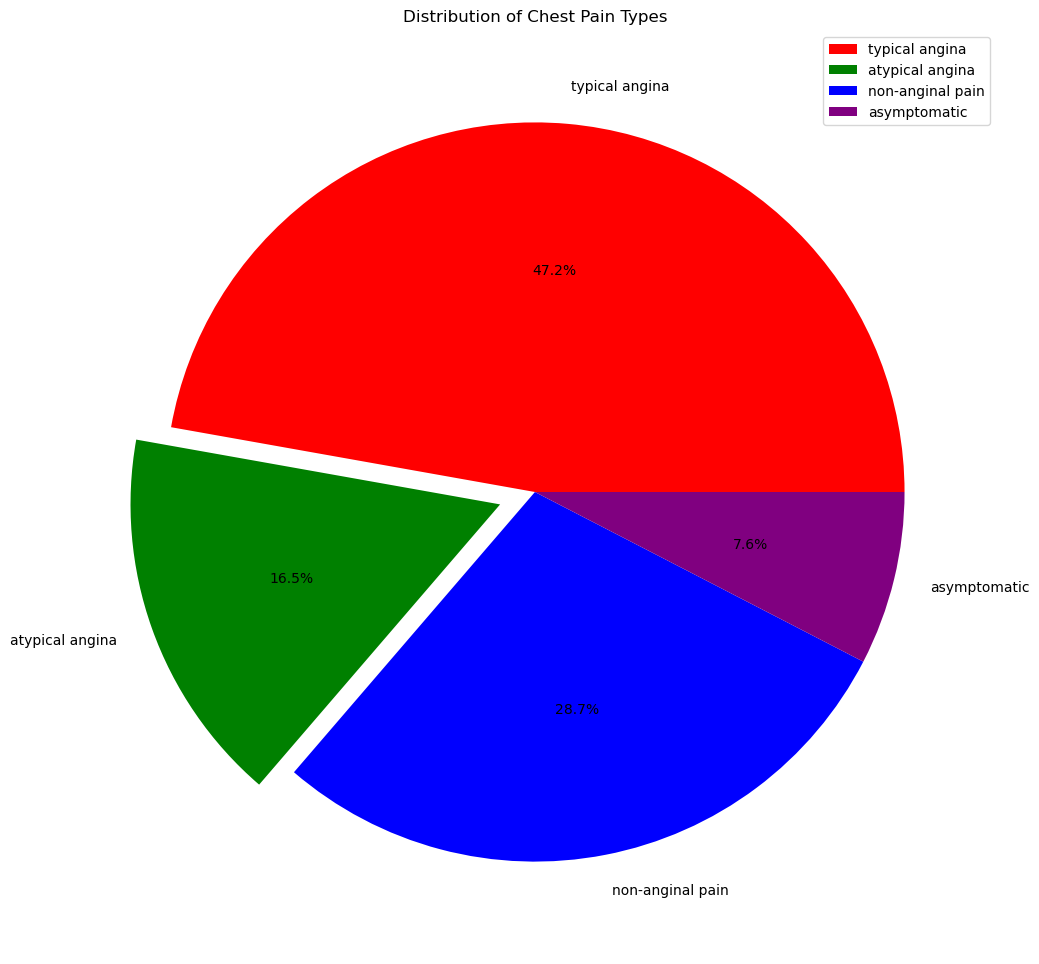

In [73]:

# labels listesini belirleme
labels =  ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]

# Değer sayımını yapma ve labels sırasına göre yeniden düzenleme
count = data['cp'].value_counts().reindex(labels)

# NaN değerlerini kontrol etme ve sıfırla doldurma
print("NaN olmadan önceki count serisi:")
print(count)

# NaN sonrası count serisi (zaten yukarıda dolduruldu)
print("NaN sonrası count serisi:")
print(count)

# explode ve colors listelerinin uzunluklarının labels ile uyumlu olduğundan emin olma
explode = (0, 0.1, 0, 0)
colors = ['red', 'green', 'blue', 'purple']

# Pasta grafiği çizme
plt.figure(figsize=(12,12))
plt.pie(count, labels=count.index, autopct='%1.1f%%', explode=explode, colors=colors)
plt.legend(labels=count.index)
plt.title("Distribution of Chest Pain Types")
plt.show()

In [74]:
print(count)

cp
typical angina      143
atypical angina      50
non-anginal pain     87
asymptomatic         23
Name: count, dtype: int64
